### Step 1: Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline



### Step 2: Download the dataset

This step would download the Webacy Smart Contract Risk dataset. If you have your own dataset, then please add it to colab's environment.

In [2]:
!gdown 1andAuermOWqVXfhsh_AQ3Db93D3BIqgx

Downloading...
From: https://drive.google.com/uc?id=1andAuermOWqVXfhsh_AQ3Db93D3BIqgx
To: /content/compiled_risk_data.xlsx
100% 294k/294k [00:00<00:00, 115MB/s]


In [3]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy risk dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy risk dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [5]:
# Loading the dataset

df = pd.read_excel('compiled_risk_data.xlsx')

# Display the first five rows of the dataframe
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,: 0e95242dceab8815a44767f6ef2b20a693765e56,https://hacken.io/research/,https://hacken.io/audits/sock/,Ethereum,False,False,False,False,False,...,0.0,0.0,False,True,True,False,False,False,False,exploitation was the risk tag that was marked ...
1,Data Analytics,00x47ac3527d02e6b9631c77fad1cdee7bfa77a8a7bfd4...,https://hacken.io/discover/euler-finance-hack/,https://hacken.io/research/,Ethereum,False,False,False,False,False,...,0.0,0.0,False,False,False,False,False,False,False,The risk tags marked as true for the Euler Fin...
2,Data Analytics,0154676f95a510a855622f8ac9b07816f94edf08,https://consensys.io/diligence/audits/2024/01/...,https://consensys.io/diligence/audits/2024/01/...,Ethereum,False,False,False,True,False,...,0.0,0.0,False,True,False,False,False,False,False,The Linea smart contracts exhibit several inhe...
3,Data Analytics,01b5f3e0a5f7b9eb7af742aa8dd9ada2b6ec00cd,https://chainsecurity.com/wp-content/uploads/2...,https://chainsecurity.com/security-audit/polyg...,Polygon,False,False,False,False,False,...,0.0,0.0,False,False,False,False,False,False,False,Since all the options are marked as False base...
4,Data Analytics,02339dfda0f3caabad142060d511d10bfe93c520,https://chainsecurity.com/security-audit/limit...,https://chainsecurity.com/smart-contract-audit...,Ethereum,False,False,False,False,False,...,0.0,0.0,False,False,True,False,False,False,False,The selfdestruct risk tag was marked as true b...


In [6]:
# We can then visualize other aspects of the data.
# For example, check for data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_name                                967 non-null    object 
 1   Smart contract address                      967 non-null    object 
 2   Blog post link                              967 non-null    object 
 3   Audit website                               967 non-null    object 
 4   Chain                                       967 non-null    object 
 5   Is_closed_source                            967 non-null    bool   
 6   hidden_owner                                967 non-null    bool   
 7   anti_whale_modifiable                       967 non-null    bool   
 8   Is_anti_whale                               967 non-null    bool   
 9   Is_honeypot                                 967 non-null    bool   
 10  buy_tax       

### Frequency Analysis

In [7]:
# Let's now look at the value counts of an individual risk tag: is_airdrop_scam

df['is_airdrop_scam'].value_counts()

,count
is_airdrop_scam,
False,902
True,65


Okay so we see that over 50% of the dataset has True for the column `is_airdrop_scam`. Note that this is a dummy dataset and in real world you won't have that many scams, atleast we can hope that we don't that many scams.

Now, let's define all the risk columns in our dataset so that we can then run the analysis on the same.

In [8]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now that we know all the risk columns let's do a full frequency analysis on these columns.

In [9]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies

,True
Is_closed_source,146
hidden_owner,150
anti_whale_modifiable,112
Is_anti_whale,138
Is_honeypot,89
buy_tax,117
sell_tax,119
slippage_modifiable,139
Is_blacklisted,76
can_take_back_ownership,181


Now that we have the frequencies, we can also visualize these using a barchart

<ipython-input-10-5a383aa58995>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


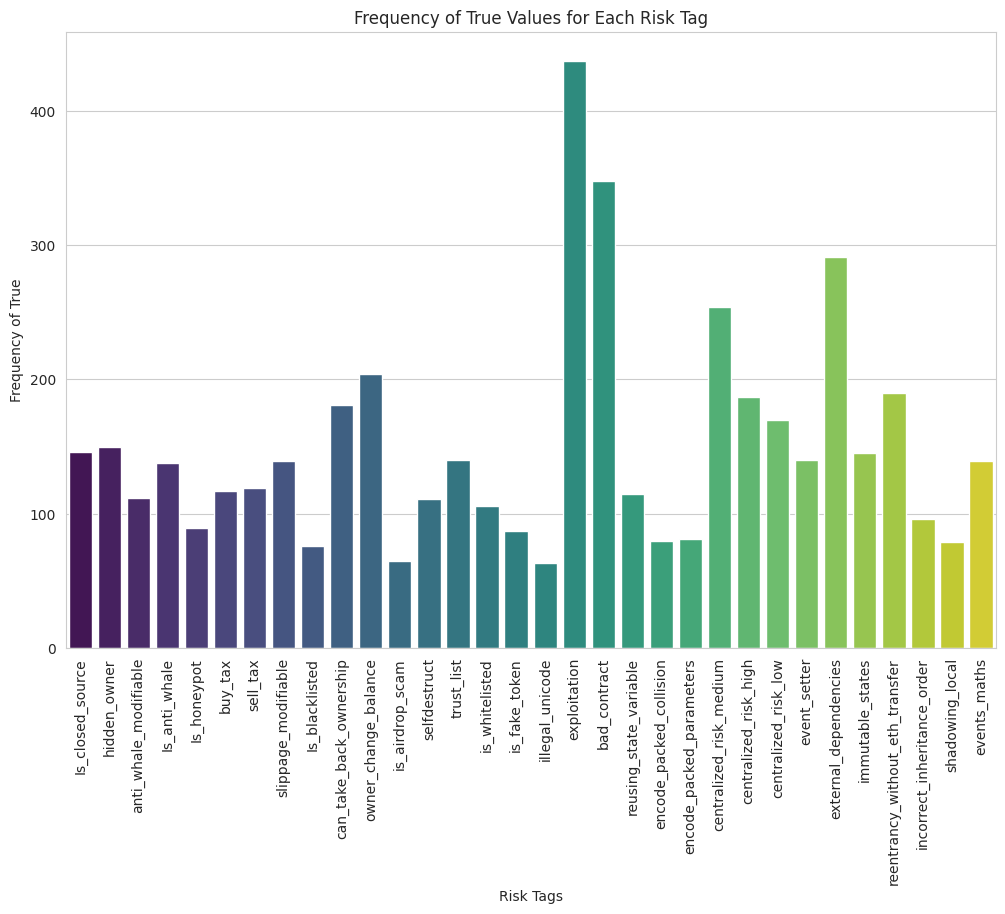

In [10]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=90)
plt.show()


**Again note that this is a dummy dataset. Your frequencies might be significantly lower than this with the real dataset.**